<a href="https://colab.research.google.com/github/DanielaCorado/Portfolio/blob/main/ENEM_2019.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introdução**

O Exame Nacional do Ensino Médio (Enem) foi instituído em 1998, com o objetivo de avaliar o desempenho escolar dos estudantes ao término da educação básica. Em 2009, o exame aperfeiçoou sua metodologia e passou a ser utilizado como mecanismo de acesso à educação superior. Os resultados do Enem possibilitam, ainda, o desenvolvimento de estudos e indicadores educacionais.

Este projeto busca fazer um estudo sobre as questões socioeconomicas dos candidatos e a relação com suas notas, para isso o inep disponibiliza os dados dos questionários repondidos durante a inscrição dos alunos.

Além disso busco criar um modelo de machine learning capaz de predizer a nota total dos candidatos.

Nos arquivos disponíveis contém a base de dados e um dicionário explicando cada uma das variáveis que contém o dataset.

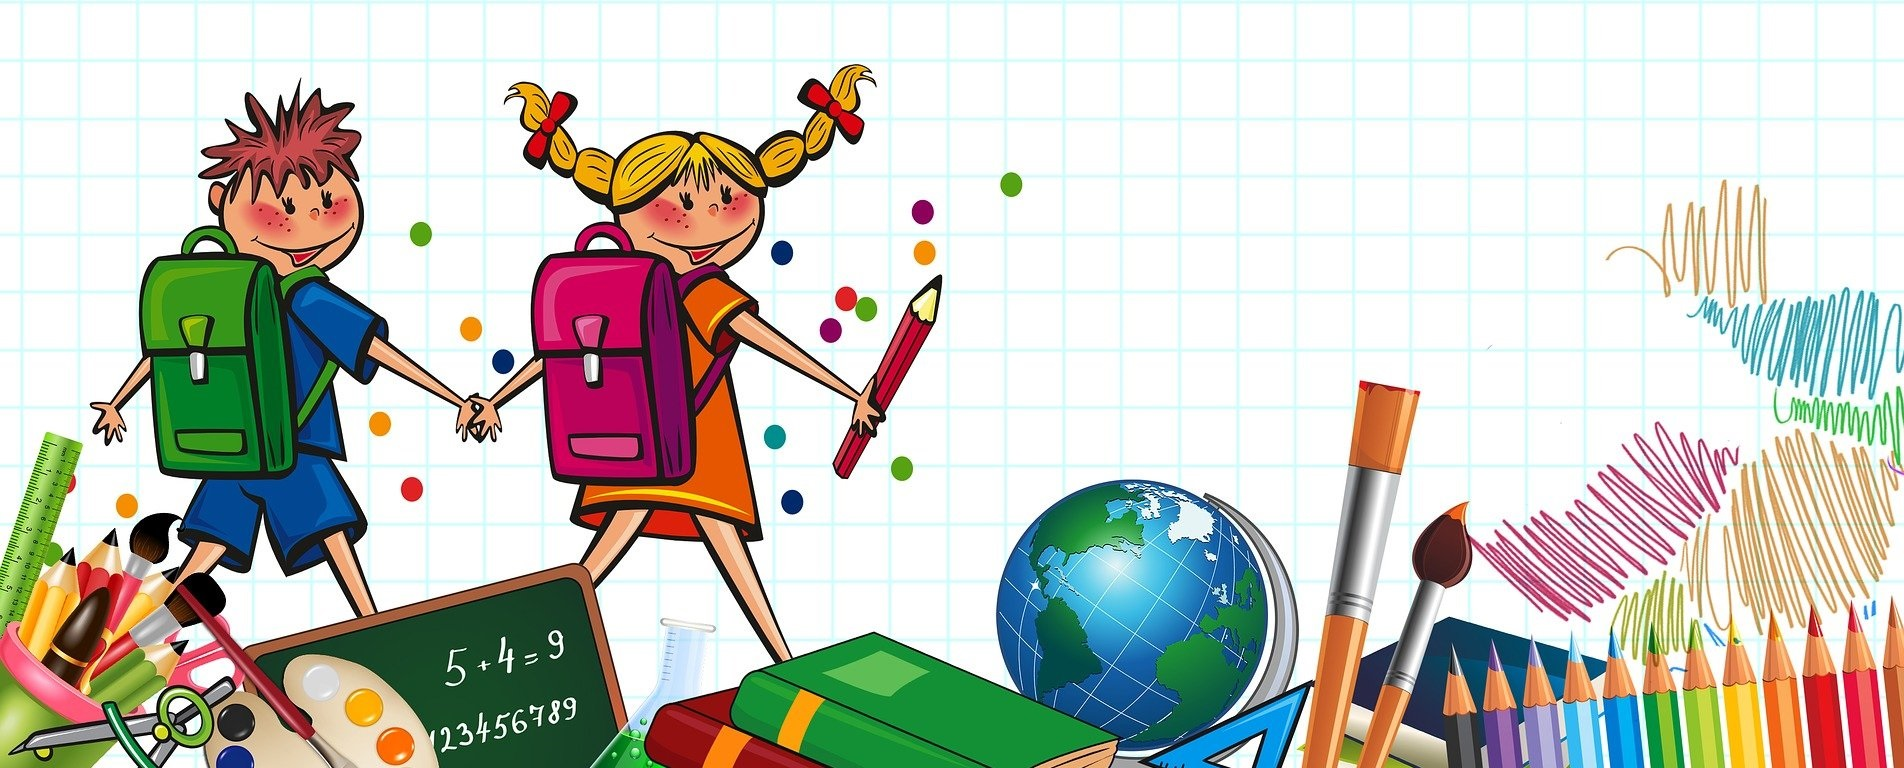

# **Conhecendo os dados**

**Conhecendo o dataset**

Nessa primeira etapa do projeto busco importar os dados e conhece-los previamente. 


* Importando os dados

In [ ]:
import pandas as pd

dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Projetos Maiores/02 - Enem 2019/MICRODADOS_ENEM_2019_SAMPLE_43278.csv')
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,A,B,A,C,A,B,B
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,A,B,A,A,B,A,A,B
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,A,B,A,B,B,A,A,B
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,A,B,A,A,B,A,A,B
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,A,B,A,A,D,A,A,B


* Tamanho do dataset

In [ ]:
dados.shape

(127380, 136)

O data set é composto por 136 colunas e 127380 linhas 

* Colunas do dataset

A seguir temos o nome de todas as colunas, o significado de cada uma delas está disponível do enem 2019 em : https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/DICION%C3%81RIO/Dicion%C3%A1rio_Microdados_Enem_2019.ods

In [ ]:
dados.columns.values

array(['NU_INSCRICAO', 'NU_ANO', 'CO_MUNICIPIO_RESIDENCIA',
       'NO_MUNICIPIO_RESIDENCIA', 'CO_UF_RESIDENCIA', 'SG_UF_RESIDENCIA',
       'NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA',
       'TP_NACIONALIDADE', 'CO_MUNICIPIO_NASCIMENTO',
       'NO_MUNICIPIO_NASCIMENTO', 'CO_UF_NASCIMENTO', 'SG_UF_NASCIMENTO',
       'TP_ST_CONCLUSAO', 'TP_ANO_CONCLUIU', 'TP_ESCOLA', 'TP_ENSINO',
       'IN_TREINEIRO', 'CO_ESCOLA', 'CO_MUNICIPIO_ESC',
       'NO_MUNICIPIO_ESC', 'CO_UF_ESC', 'SG_UF_ESC',
       'TP_DEPENDENCIA_ADM_ESC', 'TP_LOCALIZACAO_ESC', 'TP_SIT_FUNC_ESC',
       'IN_BAIXA_VISAO', 'IN_CEGUEIRA', 'IN_SURDEZ',
       'IN_DEFICIENCIA_AUDITIVA', 'IN_SURDO_CEGUEIRA',
       'IN_DEFICIENCIA_FISICA', 'IN_DEFICIENCIA_MENTAL',
       'IN_DEFICIT_ATENCAO', 'IN_DISLEXIA', 'IN_DISCALCULIA',
       'IN_AUTISMO', 'IN_VISAO_MONOCULAR', 'IN_OUTRA_DEF', 'IN_GESTANTE',
       'IN_LACTANTE', 'IN_IDOSO', 'IN_ESTUDA_CLASSE_HOSPITALAR',
       'IN_SEM_RECURSO', 'IN_BRAILLE', 'IN_AMPLIADA_24

**Analisando o número de candidatos por estado**

Para começar irei observar o total de candidato por estado, explorando as colunas e possíveis filtros

In [ ]:
dados["SG_UF_RESIDENCIA"].unique()

array(['PA', 'RO', 'MT', 'AC', 'AM', 'RR', 'MA', 'PR', 'BA', 'PI', 'CE',
       'PE', 'AP', 'TO', 'SC', 'GO', 'MG', 'SP', 'SE', 'RJ', 'PB', 'AL',
       'RN', 'ES', 'DF', 'RS', 'MS'], dtype=object)

In [ ]:
len(dados["SG_UF_RESIDENCIA"].unique())

27

* Observa-se que os valores da coluna "SG_UF_RESIDENCIA" são os estados brasileiros

In [ ]:
dados["SG_UF_RESIDENCIA"].value_counts()

SP    20264
MG    13547
BA    10040
RJ     8467
CE     7381
PA     7170
PE     6941
MA     5543
RS     5466
PR     5259
GO     4268
PB     3690
PI     3034
RN     2959
AM     2820
SC     2673
ES     2550
DF     2408
AL     2263
MT     2230
SE     1815
MS     1655
RO     1400
TO     1178
AP     1047
AC      946
RR      366
Name: SG_UF_RESIDENCIA, dtype: int64

 O resultado acima mostra o total de candidatos em cada um dos estados

**Analisando as idades dos candidatos**

Agora irei observar como é a distribuição da idades dos candidatos

* Total de candidatos por idade

In [ ]:
dados["NU_IDADE"].value_counts()

18    21452
17    21256
19    14418
20    10413
16     7830
      ...  
73        2
75        2
77        1
82        1
76        1
Name: NU_IDADE, Length: 65, dtype: int64

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

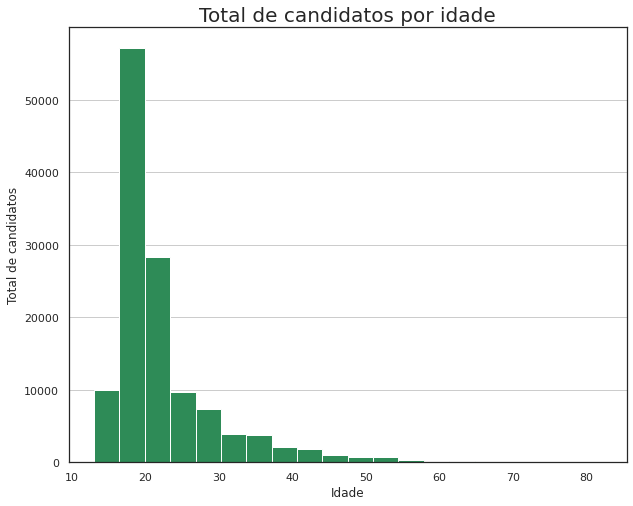

In [ ]:
sns.set()
sns.set_style('white')
plt.figure(figsize=(10, 8))
ax = dados["NU_IDADE"].hist(color='seagreen', bins=20)
ax.set_title("Total de candidatos por idade", fontsize=20)
plt.ylabel('Total de candidatos', fontsize=12)
plt.xlabel('Idade', fontsize = 12)
plt.grid(axis='x')
plt.show()

**Distribuição da idade de acordo com os candidatos treineiros e não treineiros**

<Figure size 720x576 with 0 Axes>

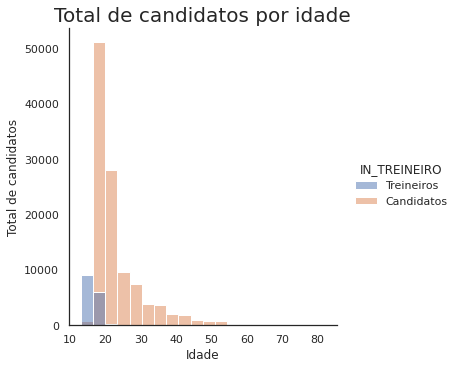

In [ ]:
sns.set()
sns.set_style('white')
plt.figure(figsize=(10, 8))
dados["IN_TREINEIRO"].replace({0:'Candidatos', 1:'Treineiros'}, inplace = True)
ax =  sns.displot(data=dados, x="NU_IDADE", hue="IN_TREINEIRO", kind='hist', bins=20)
plt.title("Total de candidatos por idade", fontsize=20)
plt.ylabel('Total de candidatos', fontsize=12)
plt.xlabel('Idade', fontsize = 12)
plt.show()

* A maioria dos candidatos treineiros tem idade menor

**Gráfico da distribuição das notas das redações**

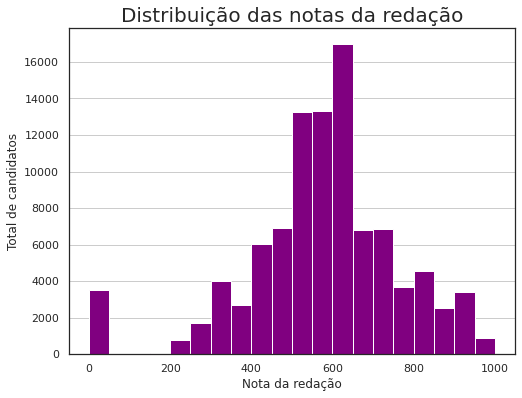

In [ ]:
sns.set()
sns.set_style('white')
plt.figure(figsize=(8, 6))
ax = dados["NU_NOTA_REDACAO"].hist(color='purple', bins=20)
ax.set_title("Distribuição das notas da redação", fontsize=20)
plt.ylabel('Total de candidatos', fontsize = 12)
plt.xlabel('Nota da redação', fontsize = 12)
plt.grid(axis='x')
plt.show()


No gráfico acima percebe-se um pico de notas igual a zero, isso occore nos casos onde os alunos faltaram a prova ou foram eliminados. 

* Média das redações

In [ ]:
dados["NU_NOTA_REDACAO"].mean()

571.5700253970197

* Desvio padrão das notas das redações

In [ ]:
dados["NU_NOTA_REDACAO"].std()

188.07645455751802

**Gráfico da distribuição das notas de Linguagens e Códigos**

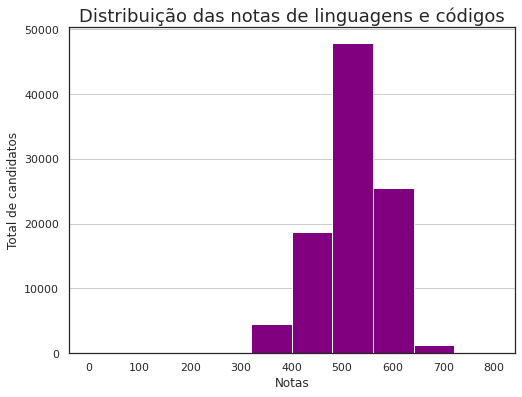

In [ ]:
sns.set()
sns.set_style('white')
plt.figure(figsize=(8, 6))
ax = dados["NU_NOTA_LC"].hist(color='purple', bins=10)
ax.set_title("Distribuição das notas de linguagens e códigos", fontsize=18)
plt.ylabel('Total de candidatos', fontsize = 12)
plt.xlabel('Notas', fontsize = 12)
plt.grid(axis='x')
plt.show()

**Análise estatística das notas do enem**

In [ ]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

dados[provas].describe()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
count,92758.000000,98043.000000,92758.000000,98043.000000,98043.000000
mean,477.964015,507.365912,523.555206,520.463928,571.570025
std,76.296099,82.972839,109.416939,64.556578,188.076455
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,418.000000,447.900000,435.300000,483.700000,480.000000
50%,470.200000,510.900000,501.600000,526.100000,580.000000
75%,533.300000,567.100000,598.200000,565.100000,680.000000
max,797.300000,809.400000,985.000000,801.700000,1000.000000


A função describe é muito interessante nela o Pandas gerará, de forma simples e rápida, um conjunto de estatísticas descritivas dessas das variáveis: a quantidade de valores, a média, o desvio padrão, o valor mínimo, os quartis da distribuição e o valor máximo.

* Boxplot das notas

Boxplot ou diagrama de caixa é uma ferramenta utilizada para identificar o maior e menor valor, mediana e quartis de um conjunto de dados. Em estatística descritiva, o diagrama de caixa, é uma ferramenta gráfica para representar a variação de dados observados de uma variável numérica por meio de quartis.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


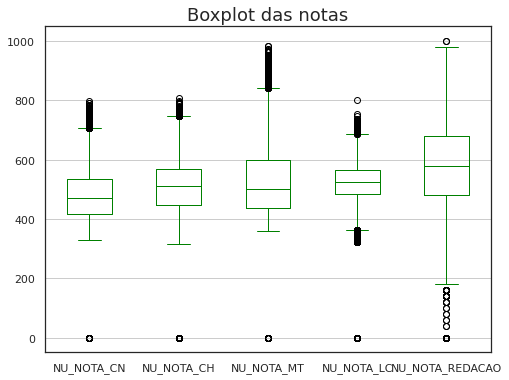

In [ ]:
sns.set()
sns.set_style('white')
plt.figure(figsize=(8, 6))
ax = dados[provas].boxplot(grid=True, figsize= (10,8), color='green')
ax.set_title("Boxplot das notas", fontsize=18)
plt.grid(axis='x')
plt.show()

Tanto a tabela como o gráfico trazem as mesmas informações, mudando apenas a forma de vizualizar

**Distribuição das notas de LC de acordo com as língua escolhida**

<Figure size 720x576 with 0 Axes>

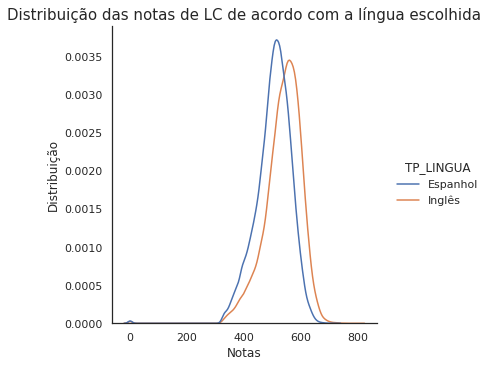

In [ ]:
sns.set()
sns.set_style('white')
plt.figure(figsize=(10, 8))
dados["TP_LINGUA"].replace({0:'Inglês', 1:'Espanhol'}, inplace = True)
ax = sns.displot(data=dados, x= "NU_NOTA_LC", hue="TP_LINGUA", kind="kde")
plt.title("Distribuição das notas de LC de acordo com a língua escolhida", fontsize=15)
plt.ylabel('Distribuição', fontsize=12)
plt.xlabel('Notas', fontsize = 12)
plt.show()

Para finalizar essa primeira parte temos um gráfico de distribuição das notas de Linguagens e Códigos de acordo com a língua estregeira escolhida pelo candidato. 

# **Análise exploratória dos dados**

Nessa fase do projeto iremos continuar fazendo análises dos dados

**Candidatos com menos de 14 anos**

Ao observar as idades dos candidatos percebi que existia alguns menores de 14 anos, uma idade bem baixa para o ENEM, por isso resolvir da uma olhada em como são esses dados.

In [ ]:
dados.query("NU_IDADE == 13")

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
57359,190003297248,2019,3504107,Atibaia,35,SP,13,F,1,1,...,B,A,A,B,A,A,D,B,B,B
95630,190004825557,2019,5107602,Rondonópolis,51,MT,13,M,1,1,...,A,A,A,B,B,A,B,A,A,B
98197,190004926952,2019,1600303,Macapá,16,AP,13,M,1,3,...,B,A,A,C,B,A,E,A,B,B
116501,190005659236,2019,2917508,Jacobina,29,BA,13,M,1,3,...,B,A,A,D,A,B,C,B,C,B


In [ ]:
dados.query("NU_IDADE <= 14")["SG_UF_RESIDENCIA"].value_counts()

PE    18
CE    15
BA    14
PA    12
MG    11
SP    11
MA     9
PI     7
GO     7
PB     7
MT     4
AM     4
DF     4
TO     3
SE     3
PR     3
AL     2
RO     2
SC     2
AP     1
RN     1
ES     1
AC     1
RS     1
RJ     1
MS     1
Name: SG_UF_RESIDENCIA, dtype: int64

* Normalizando os dados dos candidatos com menos de 14 anos

In [ ]:
dados.query("NU_IDADE <= 14")["SG_UF_RESIDENCIA"].value_counts(normalize=True)

PE    0.124138
CE    0.103448
BA    0.096552
PA    0.082759
MG    0.075862
SP    0.075862
MA    0.062069
PI    0.048276
GO    0.048276
PB    0.048276
MT    0.027586
AM    0.027586
DF    0.027586
TO    0.020690
SE    0.020690
PR    0.020690
AL    0.013793
RO    0.013793
SC    0.013793
AP    0.006897
RN    0.006897
ES    0.006897
AC    0.006897
RS    0.006897
RJ    0.006897
MS    0.006897
Name: SG_UF_RESIDENCIA, dtype: float64

* Distribuição dos alunos com menos de 14 anos de acordo com os estado


In [ ]:
alunos_menor_quartoze = dados.query("NU_IDADE <= 14")

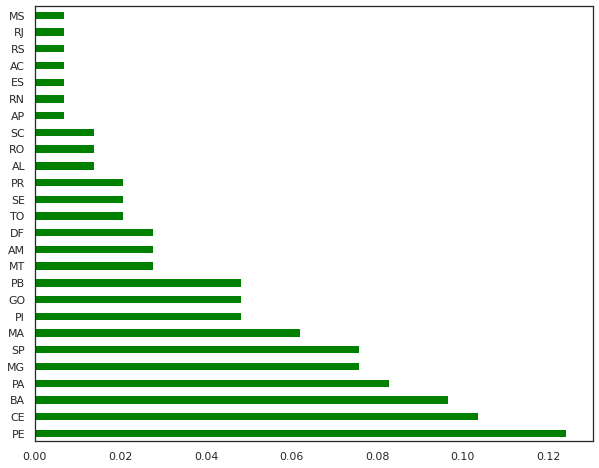

In [ ]:
alunos_menor_quartoze["SG_UF_RESIDENCIA"].value_counts(normalize = True).plot.barh(figsize=(10,8), color='green')

* Total de alunos com menos de 14 anos



In [ ]:
len(alunos_menor_quartoze)

145

Com as análises descobrimos quais estados tem mais e menos candidatos menores de 14 anos, além do número exato de candidatos com essas condições

**Boxplot das notas de matemática de acordo com a renda**

In [ ]:
renda_ordenada = dados["Q006"].unique()
renda_ordenada.sort()

In [ ]:
renda_ordenada

array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M',
       'N', 'O', 'P', 'Q'], dtype=object)

Text(0.5, 1.0, 'Boxplot das notas de matemática pela renda')

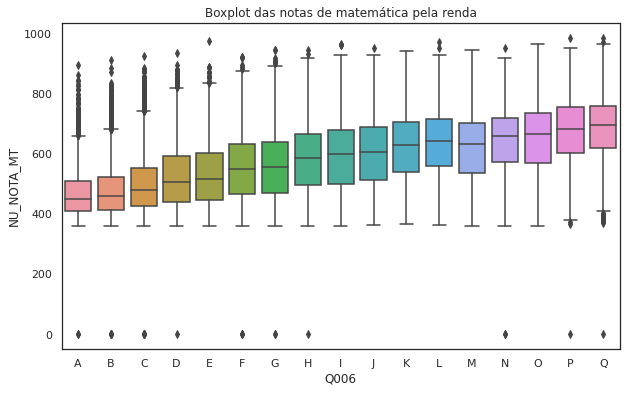

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_MT", data = dados, order = renda_ordenada)
plt.title("Boxplot das notas de matemática pela renda")

**Boxplot das notas totais de acordo com a renda**

In [ ]:
dados["NU_NOTA_TOTAL"] = dados[provas].sum(axis=1)
dados.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5


Text(0.5, 1.0, 'Boxplot do total das notas pela renda')

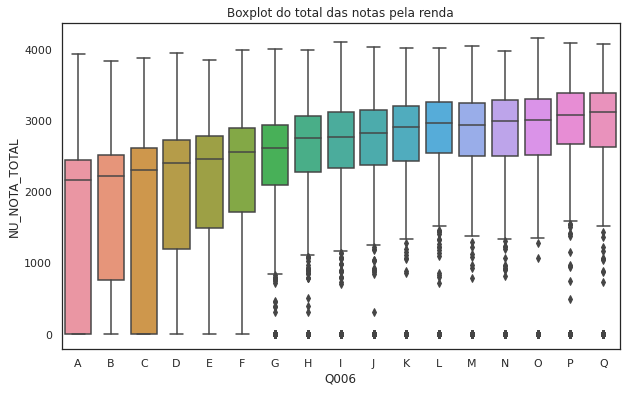

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados, order = renda_ordenada)
plt.title("Boxplot do total das notas pela renda")

* Observando a distribuiçao do total de notas

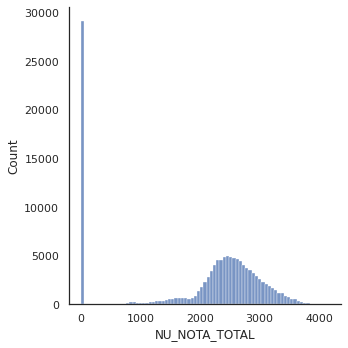

In [ ]:
sns.displot(dados, x ="NU_NOTA_TOTAL")

* Excluindo as notas zero

In [ ]:
dados_sem_notas_zero = dados.query("NU_NOTA_TOTAL != 0")
dados_sem_notas_zero.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
0,190001004661,2019,1506138,Redenção,15,PA,17,M,1,3,...,A,A,A,B,A,C,A,B,B,2288.9
1,190001004674,2019,1504208,Marabá,15,PA,23,M,1,3,...,A,A,B,A,A,B,A,A,B,1184.6
2,190001004722,2019,1501402,Belém,15,PA,35,F,2,1,...,A,A,B,A,B,B,A,A,B,2350.5
3,190001004735,2019,1507300,São Félix do Xingu,15,PA,23,F,1,3,...,A,A,B,A,A,B,A,A,B,2555.7
4,190001004776,2019,1500800,Ananindeua,15,PA,16,F,1,3,...,A,A,B,A,A,D,A,A,B,2803.5


Text(0.5, 1.0, 'Boxplot do total das notas pela renda')

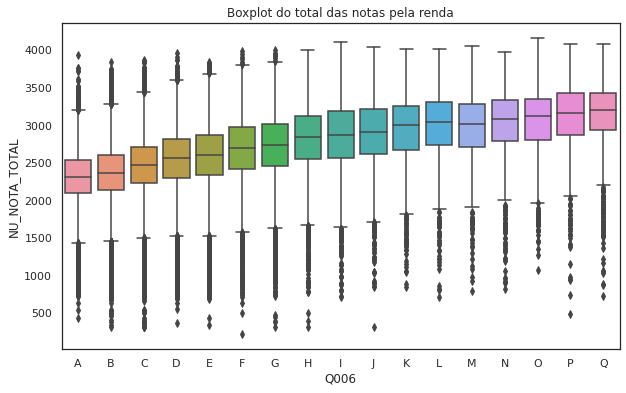

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero, order = renda_ordenada)
plt.title("Boxplot do total das notas pela renda")

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Text(0.5, 1.0, 'Boxplot das notas totais pela renda')

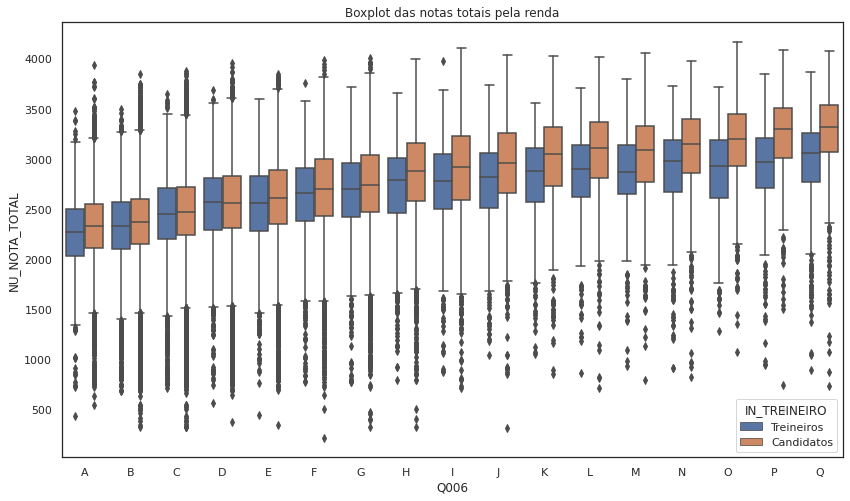

In [ ]:
plt.figure(figsize=(14, 8))
dados_sem_notas_zero["IN_TREINEIRO"].replace({0:'Candidato', 1:'Treineiro'}, inplace = True)
sns.boxplot(x="Q006", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero, 
            hue = "IN_TREINEIRO", order = renda_ordenada)
plt.title("Boxplot das notas totais pela renda")

Para conseguir o gráfico final, com o boxplot das notas de acordo com a renda dos candidatos e treineiros foi precisos fazer um tratamento dos dados, excluindo os dados faltantes e criando a coluna com o somatório das notas 

**Boxplot do total das notas de acordo com acesso a internet**

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Text(0.5, 1.0, 'Boxplot do total das notas de acordo com acesso a internet')

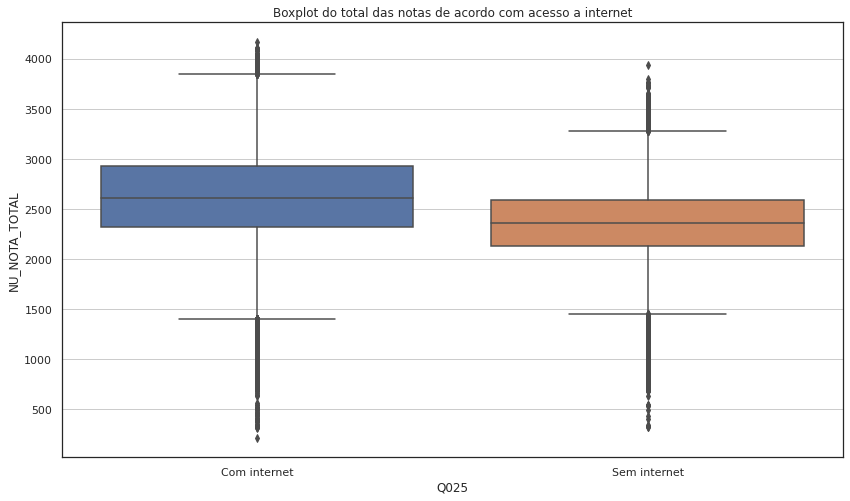

In [ ]:
plt.figure(figsize=(14, 8))
dados_sem_notas_zero["Q025"].replace({'A':'Sem internet', 'B':'Com internet'}, inplace = True)
sns.boxplot(x="Q025", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero)
plt.grid(axis='y')
plt.title("Boxplot do total das notas de acordo com acesso a internet")

* É possível ver como o fator ter internet interfere nas notas dos candidatos

* Os dados são referentes ao ano de 2019, provavelmente em 2020 essa diferença deve ter aumentado devido a pândemia 

**Conhecer os dados faltantes**

In [ ]:
dados_notas_zero = dados.query("NU_NOTA_TOTAL == 0")
dados_notas_zero.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,...,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025,NU_NOTA_TOTAL
10,190001005028,2019,1506807,Santarém,15,PA,28,F,2,3,...,A,A,B,B,A,B,A,A,A,0.0
11,190001005057,2019,1501709,Bragança,15,PA,36,F,1,3,...,A,A,B,B,A,B,A,A,B,0.0
26,190001005484,2019,1504208,Marabá,15,PA,26,M,2,3,...,A,A,B,A,A,C,A,B,B,0.0
38,190001006086,2019,1508126,Ulianópolis,15,PA,29,F,1,3,...,A,A,B,B,A,C,A,A,B,0.0
40,190001006292,2019,1504422,Marituba,15,PA,24,M,1,1,...,A,A,B,A,A,D,A,A,B,0.0


In [ ]:
provas = ["NU_NOTA_CN","NU_NOTA_CH","NU_NOTA_MT","NU_NOTA_LC","NU_NOTA_REDACAO"]

dados_notas_zero[provas].head()

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
10,NaN,NaN,NaN,NaN,NaN
11,NaN,NaN,NaN,NaN,NaN
26,NaN,NaN,NaN,NaN,NaN
38,NaN,NaN,NaN,NaN,NaN
40,NaN,NaN,NaN,NaN,NaN


* Os dados estão no formato NaN

In [ ]:
dados.query("TP_PRESENCA_CN == 0")['NU_NOTA_CN']

1        NaN
10       NaN
11       NaN
26       NaN
38       NaN
          ..
127366   NaN
127368   NaN
127369   NaN
127374   NaN
127377   NaN
Name: NU_NOTA_CN, Length: 34570, dtype: float64

* Pessoal que faltou a prova tem os dados NaN

In [ ]:
dados.query("TP_PRESENCA_CN == 2")['NU_NOTA_CN'].head(5)

1784    NaN
2867    NaN
3411    NaN
5970    NaN
15619   NaN
Name: NU_NOTA_CN, dtype: float64

* Pessoal que foi eliminado da prova tem os dados NaN

Esses ultimos comandos foram para verificar como de fato eram os dados de quem faltou ou foi eliminado da prova, para que possa ser feito a exclusão dos dados sem comprometer as análises

# **Distribuições e Correlações**

Nessa fase do projeto irei analisar a distribuição de algumas variáveis e as correlações entre as principais variáveis, afim de escolher quais serão usadas no modelo de machine learning

**Tipos de assimetria das distribuições**

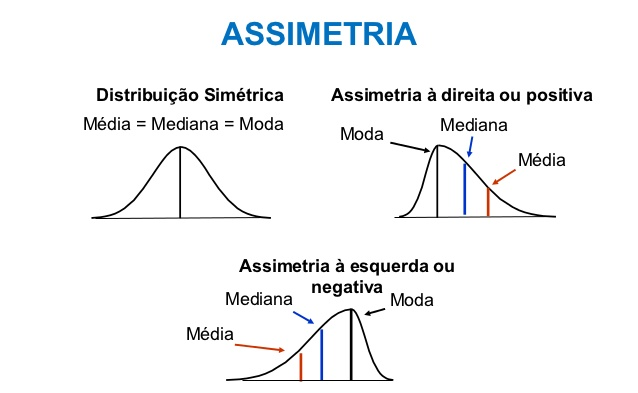

**Distribuição da nota total**

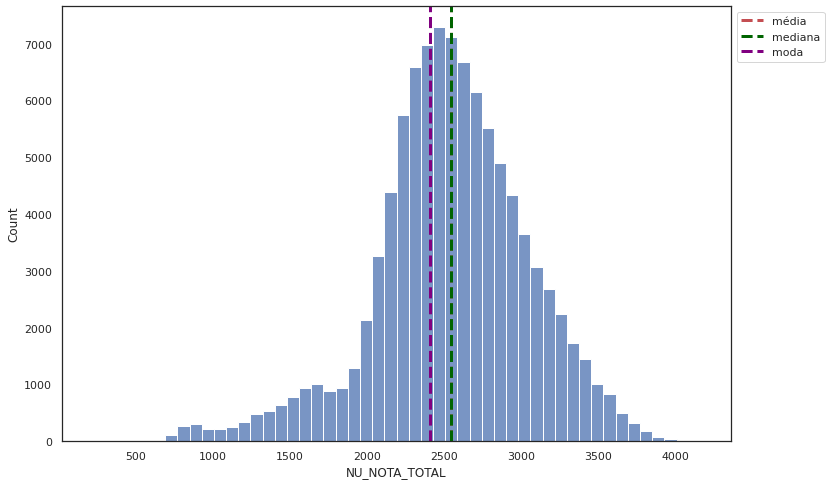

In [ ]:
plt.figure(figsize=(12,8))
moda = dados_sem_notas_zero['NU_NOTA_TOTAL'].mode()
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL", bins=50)
plt.axvline(dados_sem_notas_zero['NU_NOTA_TOTAL'].mean(), color='r', linestyle='--', linewidth=3,label = 'média')

plt.axvline(dados_sem_notas_zero['NU_NOTA_TOTAL'].median(), color='darkgreen', linestyle='--', linewidth=3,label = 'mediana')
plt.axvline(moda[0], color='purple', linestyle='--', linewidth=3,label = 'moda')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left') 


A função abaixo mede o grau de simetria da curva, em relação a distribuição normal. 

* Para dados normalmente distribuídos, a assimetria é bem próxima de zero.

* Uma assimetria positiva, com valor > 0, significa que a cauda da distribuição está mais para a direita. Ou seja, que os valores de moda < mediana < média.

* Uma assimetria negativa, com valor < 0, significa que a cauda da distribuição está mais para a esquerda. Ou seja, que os valores de média < mediana < moda.

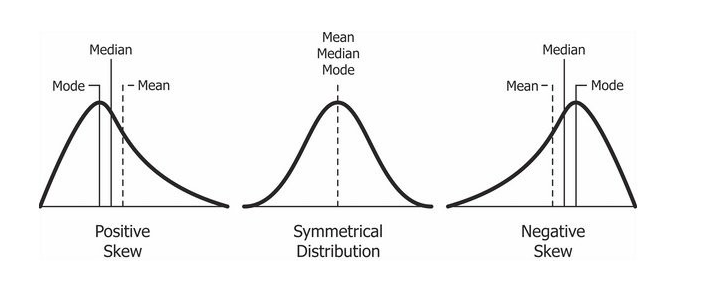

In [ ]:
dados_sem_notas_zero['NU_NOTA_TOTAL'].skew()

-0.45709476865772974

**Distribuição da nota da prova de Matemática**

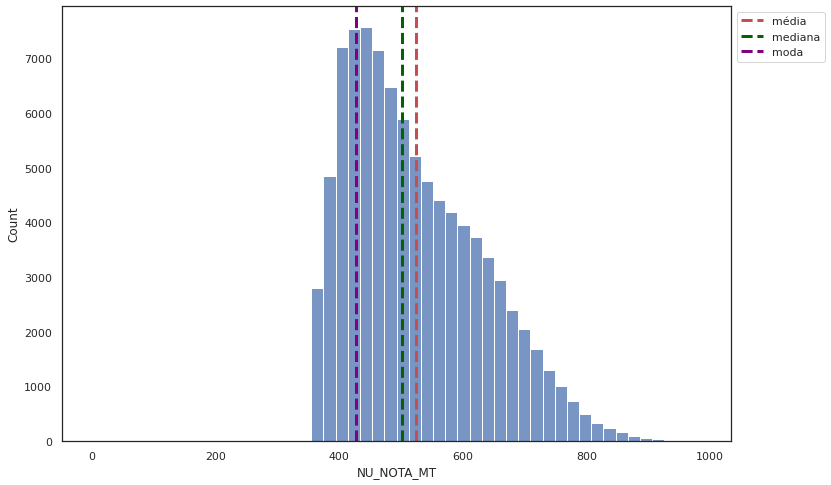

In [ ]:
plt.figure(figsize=(12,8))
moda = dados_sem_notas_zero['NU_NOTA_MT'].mode()
sns.histplot(dados_sem_notas_zero, x = 'NU_NOTA_MT', bins=50)
plt.axvline(dados_sem_notas_zero['NU_NOTA_MT'].mean(), color='r', linestyle='--', linewidth=3,label = 'média')
plt.axvline(dados_sem_notas_zero['NU_NOTA_MT'].median(), color='darkgreen', linestyle='--', linewidth=3,label = 'mediana')
plt.axvline(moda[0], color='purple', linestyle='--', linewidth=3,label = 'moda')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left') 


In [ ]:
dados_sem_notas_zero['NU_NOTA_MT'].skew()

0.6824417723146031

**Distribuição da nota da prova de Linguagens e Códigos**

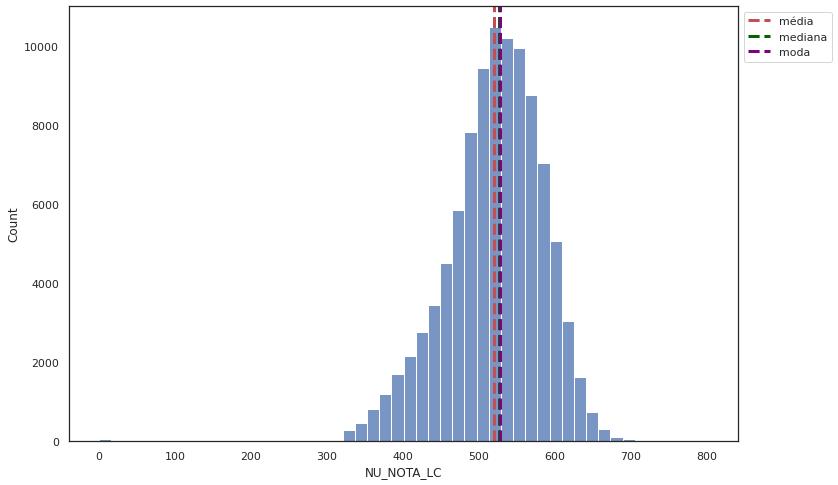

In [ ]:
plt.figure(figsize=(12,8))
moda = dados_sem_notas_zero['NU_NOTA_LC'].mode()
sns.histplot(dados_sem_notas_zero, x = 'NU_NOTA_LC', bins=50)
plt.axvline(dados_sem_notas_zero['NU_NOTA_LC'].mean(), color='r', linestyle='--', linewidth=3,label = 'média')
plt.axvline(dados_sem_notas_zero['NU_NOTA_LC'].median(), color='darkgreen', linestyle='--', linewidth=3,label = 'mediana')
plt.axvline(moda[0], color='purple', linestyle='--', linewidth=3,label = 'moda')
plt.legend(bbox_to_anchor = (1.0, 1), loc = 'upper left') 

In [ ]:
dados_sem_notas_zero['NU_NOTA_LC'].skew()

-0.6999795712834309

**Distribuição das notas de acordo com acesso a internet**

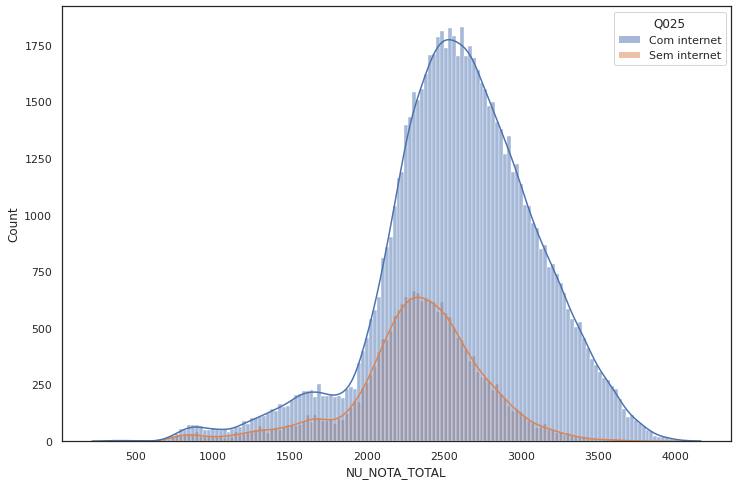

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL", hue="Q025", kde=True)


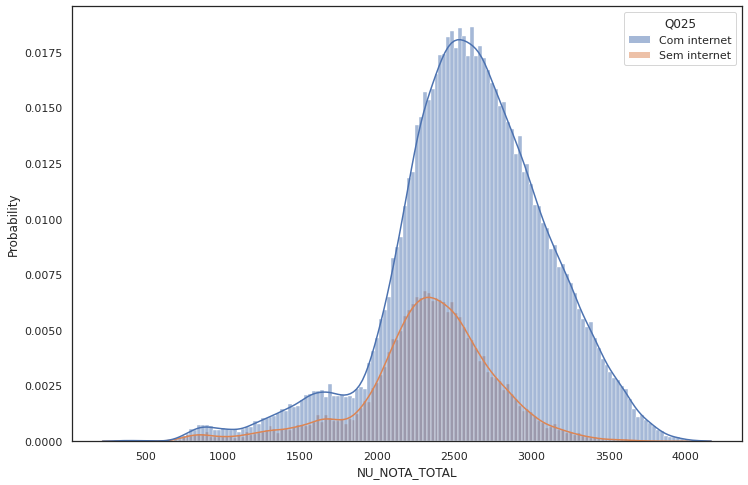

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL", hue="Q025", kde=True, stat="probability")

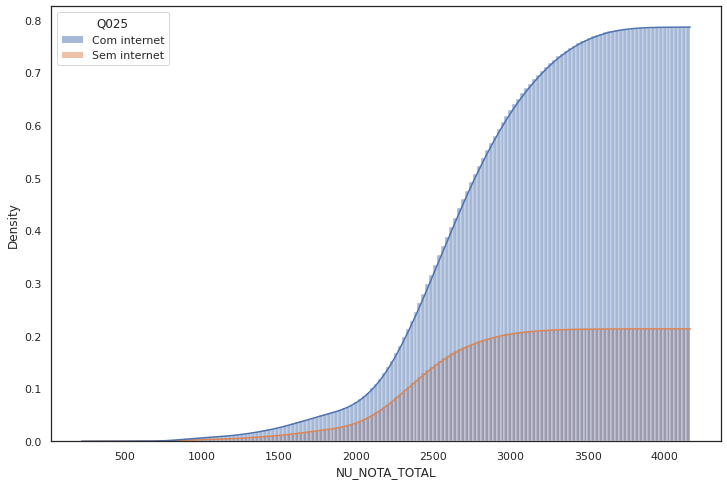

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL", hue="Q025", kde=True, stat="density", cumulative=True)

(-50.0, 1050.0)

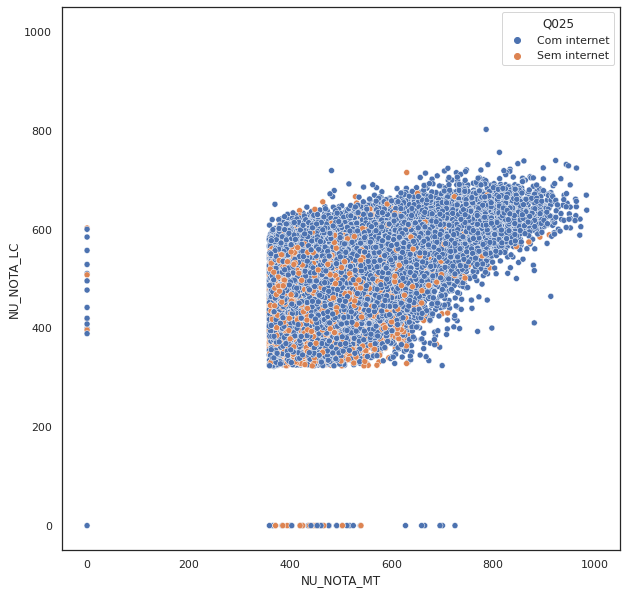

In [ ]:
plt.figure(figsize=(10, 10))
sns.scatterplot(data = dados_sem_notas_zero, x="NU_NOTA_MT", y="NU_NOTA_LC", hue="Q025")
plt.xlim((-50, 1050))
plt.ylim((-50, 1050))

**Distribuição das notas de acordo com o gênero**

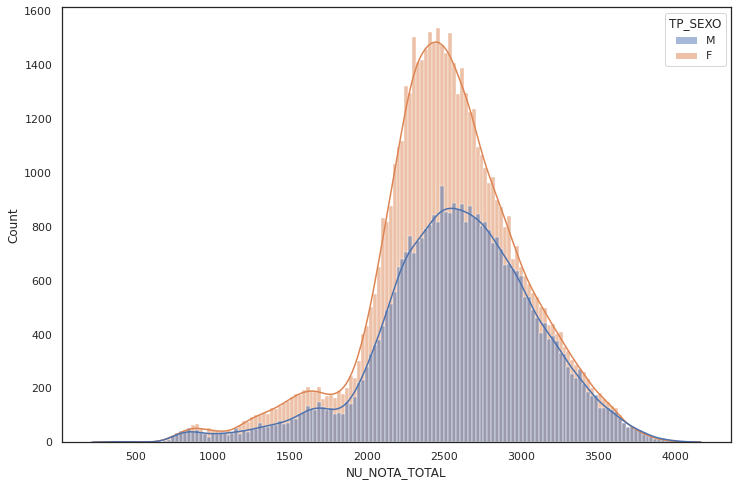

In [ ]:
plt.figure(figsize=(12,8))
sns.histplot(dados_sem_notas_zero, x = "NU_NOTA_TOTAL", hue="TP_SEXO", kde=True)


Text(0.5, 1.0, 'Boxplot das notas totais de acordo com gênero')

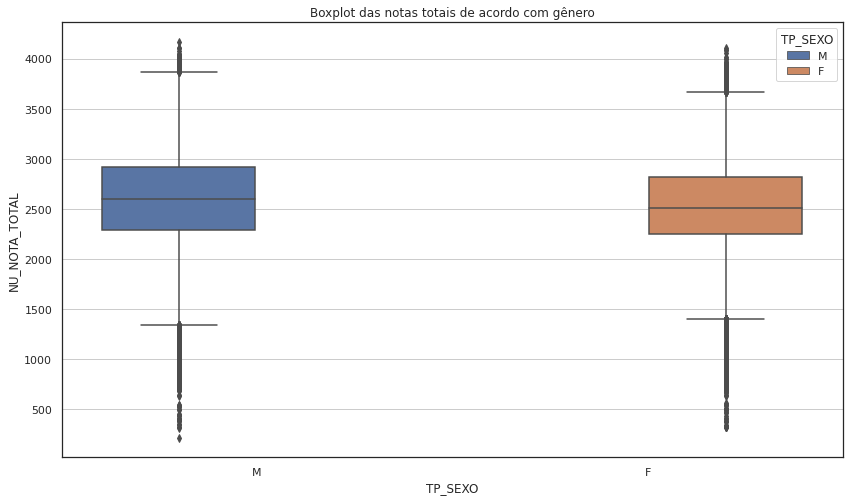

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="TP_SEXO", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero, 
            hue = "TP_SEXO")
plt.grid(axis='y')
plt.title("Boxplot das notas totais de acordo com gênero")

É possível perceber uma pequena diferença na médias das notas, onde o sexo masculino tem melhor desempenho. Outras observação é que a quantidade de mulherer fazendo a prova é maior



**Distribuição das notas de acordo com a raça**

In [ ]:
dados_sem_notas_zero["TP_COR_RACA"].replace(
    {0:'Não declarado',
    1:'Branca',
    2:'Preta',
    3:'Parda',
    4:'Amarela',
    5:'Indígena ',}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6619: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


Text(0.5, 1.0, 'Boxplot das notas totais de acordo com a raça')

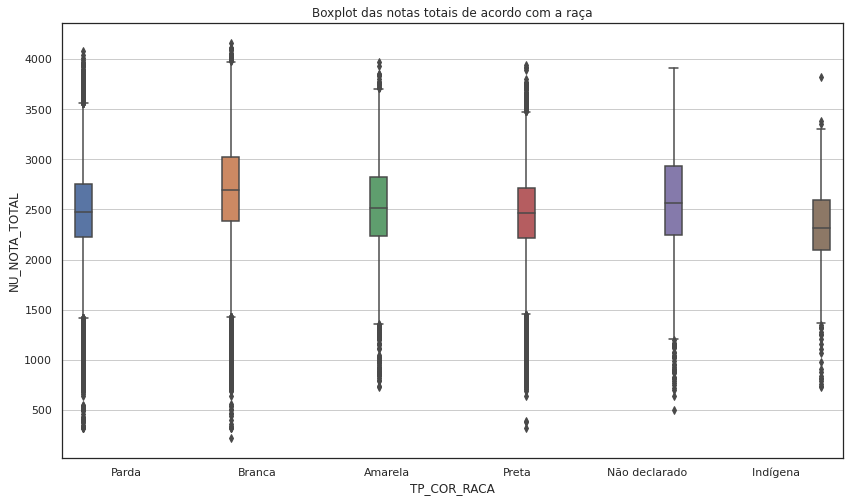

In [ ]:
plt.figure(figsize=(14, 8))
sns.boxplot(x="TP_COR_RACA", y = "NU_NOTA_TOTAL", data = dados_sem_notas_zero, 
            hue = "TP_COR_RACA")
plt.legend([],[], frameon=False)
plt.grid(axis='y')
plt.title("Boxplot das notas totais de acordo com a raça")

O gráfico acima mostra os dados estatiscos das notas totais de acordo com a raça, é possível perceber que a maior média é de candidatos brancos e a menor é dos candidatos indígenas

**Correlação entre as notas de cada matéria**

* Verificar se tem relação com ir bem em uma matéria e outra

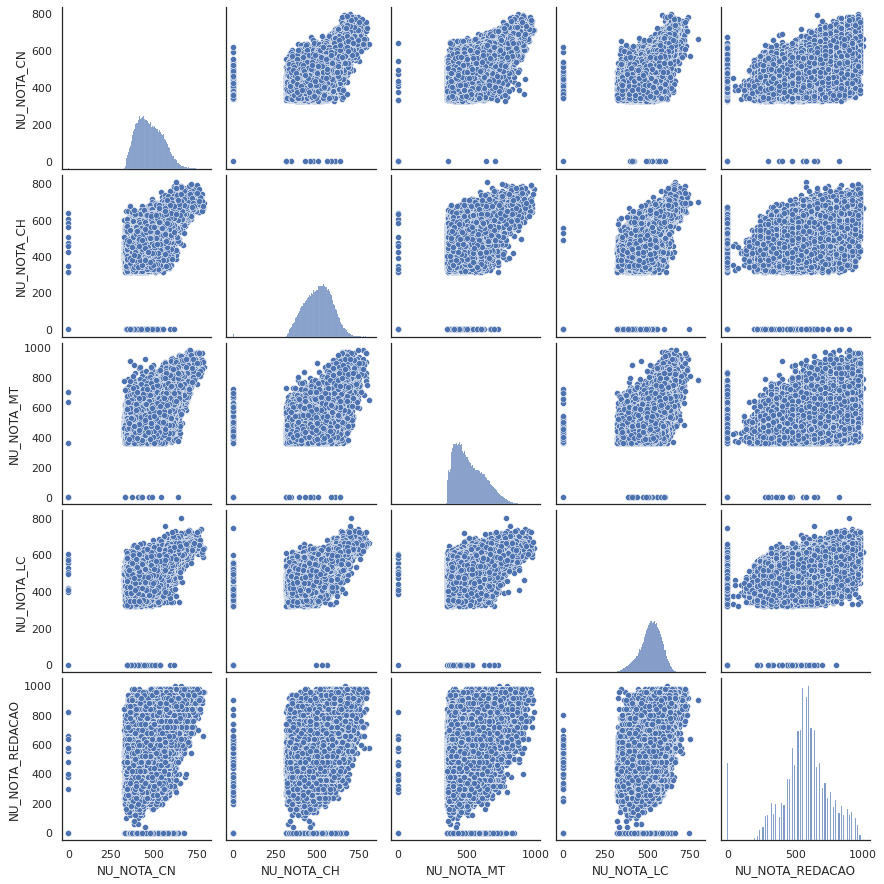

In [ ]:
sns.pairplot(dados_sem_notas_zero[provas])

In [ ]:
import numpy as np

In [ ]:
correlacao = dados_sem_notas_zero[provas].corr()
correlacao

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_MT,NU_NOTA_LC,NU_NOTA_REDACAO
NU_NOTA_CN,1.000000,0.668979,0.649527,0.641624,0.504740
NU_NOTA_CH,0.668979,1.000000,0.610332,0.744170,0.528338
NU_NOTA_MT,0.649527,0.610332,1.000000,0.587710,0.493046
NU_NOTA_LC,0.641624,0.744170,0.587710,1.000000,0.535797
NU_NOTA_REDACAO,0.504740,0.528338,0.493046,0.535797,1.000000


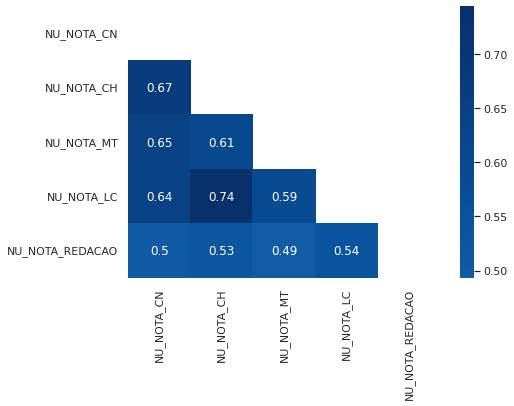

In [ ]:
mask = np.zeros_like(correlacao)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(7, 5))
    ax = sns.heatmap(correlacao, mask=mask, cmap="Blues", center=0, annot=True)

**Significado dos valores encontrados na matriz correlação:**


---



* Correlação positiva: quando duas variáveis que possuem correlação crescem ou decrescem juntas, ou seja, que possuem uma relação direta;
* Correlação negativa: quando duas variáveis que possuem correlação mas quando uma variável cresce a outra decresce, ou vice-versa;
* Não ter correlação: quando o crescimento ou decrescimento de uma variável não tem efeito sobre outra variável.

---


* ρ = 0,9 a 1 (positivo ou negativo): correlação muito forte;
* ρ = 0,7 a 09 (positivo ou negativo): correlação forte;
* ρ = 0,5 a 0,7 (positivo ou negativo): correlação moderada;
* ρ = 0,3 a 0,5 (positivo ou negativo): correlação fraca;
* ρ = 0 a 0,3 (positivo ou negativo): não possui correlação.

* Percebe-se que existe correlações relevantes entre as notas de cada matéria
* Inclusive entre as notas de português e matemática

# **Machine Learning**

**Preparando os dados para as análises**

In [ ]:
provas

['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']

In [ ]:
provas_entrada = ["NU_NOTA_CH","NU_NOTA_LC", "NU_NOTA_CN","NU_NOTA_REDACAO"]
prova_saida = "NU_NOTA_MT"
dados_sem_notas_zero = dados_sem_notas_zero[provas].dropna()
notas_entrada = dados_sem_notas_zero[provas_entrada]
notas_saida = dados_sem_notas_zero[prova_saida]

In [ ]:
notas_entrada

,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_CN,NU_NOTA_REDACAO
0,512.3,488.6,435.6,420.0
2,499.1,441.0,423.2,560.0
3,578.1,551.5,426.2,500.0
4,571.3,511.2,516.5,780.0
5,618.7,607.5,559.6,900.0
...,...,...,...,...
127373,501.5,485.3,480.4,520.0
127375,559.6,525.7,502.4,740.0
127376,380.9,450.3,449.1,520.0
127378,416.2,517.3,564.7,620.0


In [ ]:
x = notas_entrada
y = notas_saida 

**Modelo SVR**

In [ ]:
from sklearn.model_selection import train_test_split

SEED = 4321

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size = 0.25,
                                                        random_state=SEED)

In [ ]:
from sklearn.svm import LinearSVR

modelo = LinearSVR(random_state = SEED)
modelo.fit(x_treino, y_treino)

/usr/local/lib/python3.7/dist-packages/sklearn/svm/_base.py:1208: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  ConvergenceWarning,


LinearSVR(random_state=4321)

In [ ]:
predicoes_matematica = modelo.predict(x_teste)

* Avaliando o modelo

In [ ]:
from sklearn import metrics
print('MAE :', metrics.mean_absolute_error(y_teste,predicoes_matematica))
print('MSE :', metrics.mean_squared_error(y_teste,predicoes_matematica))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_teste,predicoes_matematica)))

MAE : 111.54015867411128
MSE : 18324.11972400897
RMSE : 135.36661229420264


**Método Dummy Regressor**

In [ ]:
from sklearn.dummy import DummyRegressor

modelo_dummy = DummyRegressor()
modelo_dummy.fit(x_treino, y_treino)
dummy_predicoes = modelo_dummy.predict(x_teste)

* Avaliando o modelo

In [ ]:
from sklearn import metrics
print('MAE :', metrics.mean_absolute_error(y_teste,dummy_predicoes))
print('MSE :', metrics.mean_squared_error(y_teste,dummy_predicoes))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_teste,dummy_predicoes)))

MAE : 90.38717491270496
MSE : 12063.645588509502
RMSE : 109.83462836696586


**Método Árvore de decisão**

In [ ]:
from sklearn.tree import DecisionTreeRegressor

x_treino, x_teste, y_treino, y_teste = train_test_split(x, y, test_size=0.25)
modelo_arvore = DecisionTreeRegressor(max_depth = 3)
modelo_arvore.fit(x_treino, y_treino)
predicoes_matematica_arvore = modelo_arvore.predict(x_teste)

* Avaliando o modelo

In [ ]:
from sklearn import metrics
print('MAE :', metrics.mean_absolute_error(y_teste,predicoes_matematica_arvore))
print('MSE :', metrics.mean_squared_error(y_teste,predicoes_matematica_arvore))
print('RMSE :',np.sqrt(metrics.mean_squared_error(y_teste,predicoes_matematica_arvore)))

MAE : 62.33411777469295
MSE : 6034.309712176873
RMSE : 77.68081946128576


In [ ]:
from sklearn.model_selection import cross_validate

modelo_arvore = DecisionTreeRegressor(max_depth=2)
resultados = cross_validate(modelo_arvore, x, y, cv= 10, scoring="neg_mean_squared_error")
media = (resultados["test_score"]*-1).mean()

In [ ]:
from sklearn.model_selection import cross_validate

modelo_arvore = DecisionTreeRegressor(max_depth=2)
resultados = cross_validate(modelo_arvore, x, y, cv= 10, scoring="neg_mean_squared_error")
media = (resultados["test_score"]*-1).mean()
desvio_padrao = (resultados["test_score"]*-1).std()
lim_inferior = media - (2*desvio_padrao)
lim_superior = media + (2*desvio_padrao)

print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

Intervalo de confiança 6015.722549536816 - 7100.732779780731


In [ ]:
resultados["test_score"]*-1

array([6118.6911947 , 6536.09830186, 6338.64260896, 6456.70685686,
       6234.97203593, 6794.25120283, 6713.45694262, 6693.04880297,
       6610.58461646, 7085.82408339])

In [ ]:
def calcula_mse(resultados):
    media = (resultados["test_score"]*-1).mean()
    desvio_padrao = (resultados["test_score"]*-1).std()
    lim_inferior = media - (2*desvio_padrao)
    lim_superior = media + (2*desvio_padrao)
    print(f"Intervalo de confiança {lim_inferior} - {lim_superior}")

In [ ]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import KFold
import numpy as np

SEED= 1232
np.random.seed(SEED)



partes = KFold(n_splits = 10, shuffle=True)
modelo_arvore = DecisionTreeRegressor(max_depth=3)
resultados = cross_validate(modelo_arvore, x, y, cv= partes, scoring="neg_mean_squared_error")
calcula_mse(resultados)

Intervalo de confiança 5858.741842392759 - 6250.793292491384


In [ ]:
def regressor_arvore(nivel):
    SEED= 1232
    np.random.seed(SEED)
    partes = KFold(n_splits = 10, shuffle=True)
    modelo_arvore = DecisionTreeRegressor(max_depth=nivel)
    resultados = cross_validate(modelo_arvore, x, y, cv= partes, 
                                scoring="neg_mean_squared_error", return_train_score=True)
    print(f"Treino = {(resultados['train_score']*-1).mean()}|Teste = {(resultados['test_score']*-1).mean()}")

regressor_arvore(4)

Treino = 5760.834451245899|Teste = 5815.707286597402


In [ ]:
for i in range(1,21):
    regressor_arvore(i)

Treino = 7844.952652412207|Teste = 7857.871770206351
Treino = 6527.783475408351|Teste = 6556.886287657656
Treino = 6021.275229419075|Teste = 6054.767567442072
Treino = 5760.834451245899|Teste = 5815.707286597402
Treino = 5598.158955426787|Teste = 5675.196789060744
Treino = 5469.677369145869|Teste = 5593.304363812442
Treino = 5369.458309852721|Teste = 5541.646599457925
Treino = 5276.16965707928|Teste = 5542.053091078966
Treino = 5166.713159932668|Teste = 5608.390265709719
Treino = 5022.598049115693|Teste = 5761.4934268457555
Treino = 4833.560706021637|Teste = 5955.958714168911
Treino = 4598.125022484774|Teste = 6216.553608637031
Treino = 4316.3791662866815|Teste = 6514.07032957674
Treino = 4000.6209880837496|Teste = 6848.344737600635
Treino = 3655.8197526274853|Teste = 7235.435245488157
Treino = 3295.832684540846|Teste = 7633.948584409428
Treino = 2931.7212612043872|Teste = 8059.378759944782
Treino = 2575.59534021339|Teste = 8435.937377688437
Treino = 2233.5742434614776|Teste = 8819.086

Dentre os modelos testados a árvore de decisão obteve melhor eficiência

# **Referência**

**Dados Enem 2019 :** https://www.gov.br/inep/pt-br/acesso-a-informacao/dados-abertos/microdados/enem

**Dicionário dos dados :** https://github.com/alura-cursos/imersao-dados-2-2020/blob/master/DICION%C3%81RIO/Dicion%C3%A1rio_Microdados_Enem_2019.ods

**Overfitting e underfitting :** https://abracd.org/overfitting-e-underfitting-em-machine-learning/

